In [2]:
import matplotlib.pyplot as plt
import numpy as np
import mdtraj as md
import glob

In [11]:
#qmmm_3_5_md
file_path = "/home/oriol/Oriol/GH_A/jupyter_scripts/rmsd_qmmm_equil.dat"

In [4]:
name = "class_N172T"
file_path = "/home/oriol/Oriol/GH_A/GH79/classical/N172T/rmsd_wholeprot.dat"
frame_time = 20 #ps

In [ ]:
rmsd_file = open(file_path, 'r')
rmsd = np.loadtxt(rmsd_file)
rmsd_file.close()

In [49]:
name = "R76K_prod"
dir_name = "/home/oriol/Oriol/GH_A/GH79/classical/R76K/prod/"
top_name = "/home/oriol/Oriol/GH_A/GH79/classical/R76K/3vo0_R76K.prmtop"
top = md.load_prmtop(top_name)
traj_list = glob.glob(dir_name+"*prod*.nc")
traj_list.sort()
all_traj = md.load(traj_list, top=top)

In [52]:
name = "N172T_prod"
dir_name = "/home/oriol/Oriol/GH_A/GH79/classical/N172T/prod/"
top_name = "/home/oriol/Oriol/GH_A/GH79/classical/N172T/3vo0_N172T.prmtop"
top = md.load_prmtop(top_name)
traj_list = glob.glob(dir_name+"*prod*.nc")
traj_list.sort()
all_traj = md.load(traj_list, top=top)

In [53]:
selection = top.select('backbone and not residue 460 to 466')

In [ ]:
selection = top.select('backbone')

In [51]:
all_traj.center_coordinates()
rmsd = md.rmsd(all_traj,all_traj, 0, atom_indices=selection)

In [54]:
all_traj.center_coordinates()
rmsd1 = md.rmsd(all_traj,all_traj, 0, atom_indices=selection)

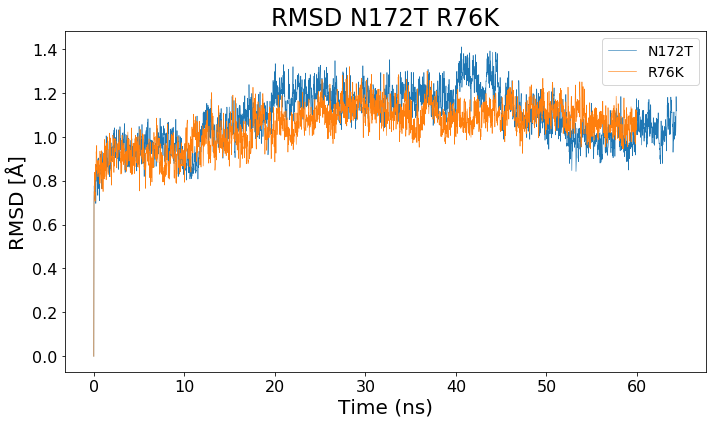

In [65]:
frame_time = 20 #Normalment és 20ps/frame per producció i 10ps/frame per equilibració de MD clàssica
x_value=np.arange(len(rmsd))
x_value1=np.arange(len(rmsd1))

plt.figure(figsize=(10,6))
# plt.plot(rmsd[:,0]*100/8268,rmsd[:,1])
# plt.plot(rmsd[:,0]*frame_time/1000,rmsd[:,1])
plt.plot(x_value*frame_time/1000,rmsd*10, linewidth=0.6, label="N172T")
plt.plot(x_value1*frame_time/1000,rmsd1*10, linewidth=0.6, label="R76K")


# plt.title("RMSD_{}".format(name), fontsize=24)
plt.title("RMSD N172T R76K", fontsize=24)
plt.xlabel("Time (ns)", fontsize=20)
# plt.xlabel("Time (ps)", fontsize=20)
plt.ylabel("RMSD [Å]", fontsize=20)

plt.legend(fontsize=14)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.tight_layout()

# plt.savefig("RMSD_{}.png".format(name))
plt.savefig("RMSD_N172T-R76K.png")

plt.show()

In [ ]:
#GlcA_deprot
rmsd_file = open("/home/oriol/Oriol/GH_A/3_glca_deprot/clas_deprot/rmsd_deprot.dat", "r")

In [ ]:
#new protonation state
rmsd_file = open("/home/oriol/Oriol/GH_A/4_new_prot_state/rmsd_newprot.dat", "r")

In [3]:
#His241_deprot
rmsd_file = open("/home/oriol/Oriol/GH_A/5_his241_deprot/rmsd_deprot.dat", "r")

In [28]:
#21 without 6 last residues
rmsd_file = open("/home/oriol/Oriol/GH_A/21_E45deprot_19/rmsd_notail.dat", "r")

In [29]:
#21
rmsd_file2 = open("/home/oriol/Oriol/GH_A/21_E45deprot_19/rmsd_deprot.dat", "r")

In [4]:
#27
rmsd_file = open("/home/oriol/Oriol/GH_A/27_restraint21/rmsd_deprot.dat", "r")

In [2]:
#27_long
rmsd_file = open("/home/oriol/Oriol/GH_A/27_restraint21/rmsd_rest3.dat", "r")

In [3]:
#qmmm_3_5_md
rmsd_file = open("/home/oriol/Oriol/GH_A/jupyter_scripts/rmsd_.dat", "r")

In [3]:
m = ""
m = rmsd_file.readline()
rmsd_dict = {}
while m:
    frame,rmsd_value = m.split("\t")
    rmsd_dict[int(frame)] = float(rmsd_value[:-1]) #float?
    m = rmsd_file.readline()

In [31]:
m2 = ""
m2 = rmsd_file2.readline()
rmsd_dict2 = {}
while m2:
    frame,rmsd_value2 = m2.split("\t")
    rmsd_dict2[int(frame)] = float(rmsd_value2[:-1]) #float?
    m2 = rmsd_file2.readline()

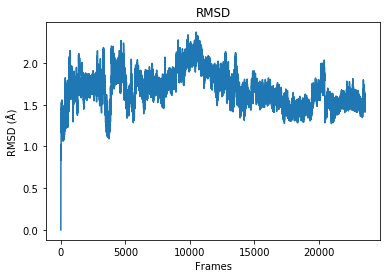

In [4]:
plt.plot(rmsd_dict.keys(), rmsd_dict.values())
#plt.ylim(0,2.5)
#plt.legend()
plt.title("RMSD")
plt.xlabel("Frames")
plt.ylabel("RMSD (Å)")
#plt.savefig("rmsd_deprot.png")
plt.show()

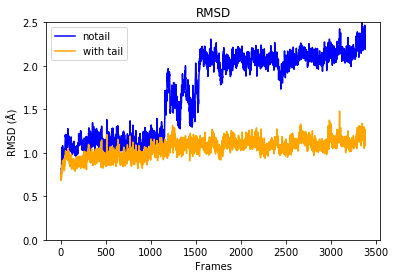

In [37]:
plt.plot(rmsd_dict2.keys(), rmsd_dict2.values(), color = "blue", label = "notail")
plt.plot(rmsd_dict.keys(), rmsd_dict.values(), color = "orange", label = "with tail")
plt.ylim(0,2.5)
plt.legend()
plt.title("RMSD")
plt.xlabel("Frames")
plt.ylabel("RMSD (Å)")
#plt.savefig("rmsd_deprot.png")
plt.show()

In [3]:
1000/(0.0241888428*3)

10335.343532845647

In [21]:
folder="/home/oriol/Oriol/GH_A/qmmm/3_2nd_frame_centered/5_md/"
num_files=[1,2,3,4,5,6,7]

In [25]:
rmsd_list = []
for i in num_files:
    with md.formats.DCDTrajectoryFile("{}TRAJEC{}.dcd".format(folder,i)) as f:
        f.read()
        value = md.rmsd(f,md.load_dcd("{}TRAJEC{}.dcd".format(folder,1), top = "{}gromos_cap.g96".format(folder),frame=0))
        rmsd_list.append([f.time(),value])




OSError: The topology is loaded by filename extension, and the detected ".g96" format is not supported. Supported topology formats include ".pdb", ".pdb.gz", ".h5", ".lh5", ".prmtop", ".parm7", ".psf", ".mol2", ".hoomdxml", ".gro", ".arc" and ".hdf5".

In [ ]:
rmsd_list = []
for i in num_files:
    traj = md.load_dcd("{}TRAJEC{}.dcd".format(folder,i), top = )
    
    for md.load_dcd("{}TRAJEC{}.dcd".format(folder,i), top = ) as f:

93600